## Import CSV

In [395]:
import pandas
def read_csv(filename,folder):
    folder=folder+"/"+filename+".csv"
    return pandas.read_csv(folder,encoding='ISO-8859-1')


In [396]:
folder="/nfs/Workspace/"
data=read_csv(filename="WEN",folder=folder)
data.columns = ( 'DATE','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh','spx')
data = data.fillna(method='ffill')
data.head()

,DATE,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,2017-09-26,218.231659,10.17,9.976272,25.884623,43.633526,64.915009,31.513302,4843.140137
1,2017-09-27,219.121857,9.87,9.948611,26.088360,42.785797,64.758858,31.406380,4862.930176
2,2017-09-28,219.424911,9.55,9.948611,26.156273,42.688362,64.680794,31.367496,4869.810059
3,2017-09-29,220.248840,9.51,9.959696,26.317326,42.571430,64.602730,31.270290,4887.970215
4,2017-10-02,221.101120,9.45,9.959696,26.447330,42.045261,64.173347,31.114765,4906.919922


In [397]:
from matplotlib import pyplot
def plot_data(dataset,groups):
    i = 1
    pyplot.figure()
    values = dataset.values
    for group in groups:
    	pyplot.subplot(len(groups), 1, i)
    	pyplot.plot(values[:, group])
    	pyplot.title(dataset.columns[group], y=0.5, loc='right')
    	i += 1
    pyplot.show()

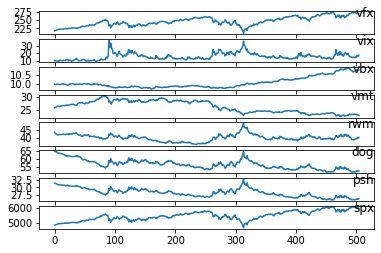

In [398]:
plot_data(data,groups=list(range(1,9)))

## Data Summary

In [399]:
data.describe()

,vfx,vix,vbx,vmt,rwm,dog,psh,spx
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,246.340365,15.507941,10.047692,26.339957,40.233506,56.539293,28.204469,5475.355032
std,13.722237,4.444635,0.323044,2.222643,2.033488,2.912484,1.440377,308.508918
min,210.128433,9.140000,9.683455,22.548750,36.076992,51.579994,25.667391,4672.660156
25%,235.805130,12.410000,9.806242,24.241268,39.145985,54.319283,26.986738,5239.589844
50%,245.892288,14.750000,9.943701,26.660774,40.291241,56.239548,28.127993,5459.500000
75%,257.598206,17.900000,10.225506,28.380741,41.502472,58.240051,29.263840,5729.450195
max,273.387878,37.320000,10.931587,30.474449,48.979759,64.915009,32.930397,6083.819824


## Independent and identically distributed (I.I.D.) Testing

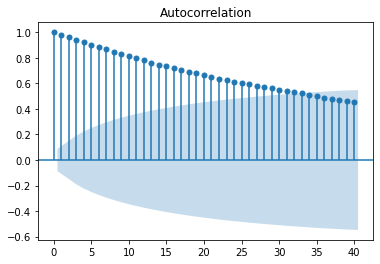

In [400]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(data['vfx'].values, lags=40)
plt.show()

## *** LSTM ***

In [401]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def Standard_MinMax(data):
    sc = MinMaxScaler(feature_range = (0, 1))
    
    return sc.fit_transform(data.reshape(-1,1))

In [402]:
#folder="/Users/wenyongjing/Downloads/第二章"
#data=read_csv(filename="WEN",folder=folder)
#data.columns = ( 'DATE','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh', 'spx')
del data['DATE']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
data.head()

,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,218.231659,10.17,9.976272,25.884623,43.633526,64.915009,31.513302,4843.140137
1,219.121857,9.87,9.948611,26.088360,42.785797,64.758858,31.406380,4862.930176
2,219.424911,9.55,9.948611,26.156273,42.688362,64.680794,31.367496,4869.810059
3,220.248840,9.51,9.959696,26.317326,42.571430,64.602730,31.270290,4887.970215
4,221.101120,9.45,9.959696,26.447330,42.045261,64.173347,31.114765,4906.919922


## Series to Supervised

In [403]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [404]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.128095,0.036551,0.234604,0.420893,0.585652,1.000000,0.804889,0.120808,0.142167,0.025905,0.212442,0.446599,0.519951,0.988290,0.790167,0.134832
2,0.142167,0.025905,0.212442,0.446599,0.519951,0.988290,0.790167,0.134832,0.146958,0.014549,0.212442,0.455168,0.512399,0.982436,0.784814,0.139708
3,0.146958,0.014549,0.212442,0.455168,0.512399,0.982436,0.784814,0.139708,0.159983,0.013130,0.221323,0.475488,0.503337,0.976582,0.771430,0.152577
4,0.159983,0.013130,0.221323,0.475488,0.503337,0.976582,0.771430,0.152577,0.173455,0.011001,0.221323,0.491891,0.462557,0.944382,0.750016,0.166005
5,0.173455,0.011001,0.221323,0.491891,0.462557,0.944382,0.750016,0.166005,0.181091,0.013130,0.228727,0.498012,0.458026,0.929746,0.743325,0.173666


In [405]:
pred = {'vfx': 8}
reframed = pandas.concat([reframed.iloc[:,0:8],reframed.iloc[:,pred['vfx']]],axis=1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.128095,0.036551,0.234604,0.420893,0.585652,1.000000,0.804889,0.120808,0.142167
2,0.142167,0.025905,0.212442,0.446599,0.519951,0.988290,0.790167,0.134832,0.146958
3,0.146958,0.014549,0.212442,0.455168,0.512399,0.982436,0.784814,0.139708,0.159983
4,0.159983,0.013130,0.221323,0.475488,0.503337,0.976582,0.771430,0.152577,0.173455
5,0.173455,0.011001,0.221323,0.491891,0.462557,0.944382,0.750016,0.166005,0.181091


In [406]:
reframed.shape

(504, 9)

## Data Split

In [407]:
train = reframed.values[:400,:]
test = reframed.values[400:504,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((400, 8), (400,), (104, 8), (104,))

## LSTM

In [408]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X  = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

import keras
from keras import layers
from keras.layers import Dropout

model = keras.models.Sequential()
model.add(layers.LSTM(6, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
#model.add(Dropout(0.5))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 6)                 360       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 367
Trainable params: 367
Non-trainable params: 0
_________________________________________________________________


## Training

In [409]:
history = model.fit(train_X, train_y, epochs=80, 
                    batch_size=72, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

Epoch 1/80
6/6 [==============================] - 0s 57ms/step - loss: 0.2319 - val_loss: 0.5372
Epoch 2/80
6/6 [==============================] - 0s 4ms/step - loss: 0.2051 - val_loss: 0.4942
Epoch 3/80
6/6 [==============================] - 0s 4ms/step - loss: 0.1804 - val_loss: 0.4530
Epoch 4/80
6/6 [==============================] - 0s 4ms/step - loss: 0.1576 - val_loss: 0.4137
Epoch 5/80
6/6 [==============================] - 0s 4ms/step - loss: 0.1366 - val_loss: 0.3764
Epoch 6/80
6/6 [==============================] - 0s 12ms/step - loss: 0.1177 - val_loss: 0.3414
Epoch 7/80
6/6 [==============================] - 0s 4ms/step - loss: 0.1008 - val_loss: 0.3087
Epoch 8/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0860 - val_loss: 0.2784
Epoch 9/80
6/6 [==============================] - 0s 4ms/step - loss: 0.0731 - val_loss: 0.2506
Epoch 10/80
6/6 [==============================] - 0s 12ms/step - loss: 0.0621 - val_loss: 0.2251
Epoch 11/80
6/6 [==================

## Plot Loss Curve

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


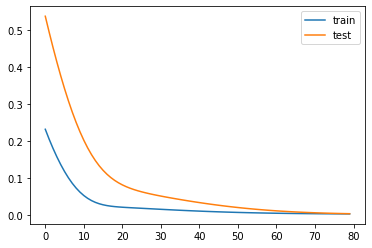

In [410]:
%pylab inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Model Predict

In [469]:
import datetime
folder="/nfs/Workspace/"
pred_data=read_csv(filename="PRED_NEW",folder=folder)
pred_data.columns = ( 'Date','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh', 'spx')
#pred_data.isnull().sum()
pred_data = pred_data.fillna(method='ffill')

# Copy Last date to tomorrow
tmp = pred_data[-1:].values.tolist()
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
tomorrow = tomorrow.strftime("%y%y/%m/%d")
tmp[0][0] = tomorrow
pred_data.loc[len(pred_data)] = tmp[0]
pred_data[-3:]


,Date,vfx,vix,vbx,vmt,rwm,dog,psh,spx
288,2020/11/18,329.940002,23.84,11.61,23.705999,28.57,40.900002,18.98,7357.339844
289,2020/11/19,329.940002,23.84,11.61,23.705999,28.57,40.900002,18.98,7357.339844
290,2020/11/20,329.940002,23.84,11.61,23.705999,28.57,40.900002,18.98,7357.339844


In [421]:
del pred_data['Date']
scaler = MinMaxScaler(feature_range=(0, 1))
pred_scaled = scaler.fit_transform(pred_data)
pred_data.head()

,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,269.957398,16.240000,10.846966,23.182716,40.438496,52.261082,26.011070,6008.589844
1,266.665375,18.559999,10.866475,23.015104,41.204864,52.948467,26.339569,5935.200195
2,261.889435,20.559999,10.876229,22.696642,41.543262,53.954639,26.807430,5828.930176
3,264.041565,19.120001,10.915245,22.826788,41.384018,53.665741,26.598385,5876.859863
4,267.795471,17.040001,10.925002,23.061443,41.015755,52.928547,26.230070,5960.430176


In [422]:
pred_reframed = series_to_supervised(pred_scaled, 1, 1)
pred_reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.499932,0.066058,0.129927,0.570215,0.434114,0.398999,0.530752,0.496725,0.474738,0.098665,0.149125,0.541135,0.461276,0.421814,0.554437,0.471568
2,0.474738,0.098665,0.149125,0.541135,0.461276,0.421814,0.554437,0.471568,0.438188,0.126774,0.158723,0.485885,0.473269,0.455211,0.588171,0.435140
3,0.438188,0.126774,0.158723,0.485885,0.473269,0.455211,0.588171,0.435140,0.454658,0.106535,0.197116,0.508464,0.467625,0.445622,0.573098,0.451570
4,0.454658,0.106535,0.197116,0.508464,0.467625,0.445622,0.573098,0.451570,0.483387,0.077301,0.206717,0.549175,0.454573,0.421153,0.546542,0.480216
5,0.483387,0.077301,0.206717,0.549175,0.454573,0.421153,0.546542,0.480216,0.474211,0.088826,0.177920,0.545412,0.456690,0.428427,0.555155,0.471074


In [423]:
pred = {'vfx': 8}
pred_reframed = pandas.concat([pred_reframed.iloc[:,0:8],pred_reframed.iloc[:,pred['vfx']]],axis=1)
pred_reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.499932,0.066058,0.129927,0.570215,0.434114,0.398999,0.530752,0.496725,0.474738
2,0.474738,0.098665,0.149125,0.541135,0.461276,0.421814,0.554437,0.471568,0.438188
3,0.438188,0.126774,0.158723,0.485885,0.473269,0.455211,0.588171,0.435140,0.454658
4,0.454658,0.106535,0.197116,0.508464,0.467625,0.445622,0.573098,0.451570,0.483387
5,0.483387,0.077301,0.206717,0.549175,0.454573,0.421153,0.546542,0.480216,0.474211


In [424]:
pred_test = pred_reframed.values[:,:]
pred_test_X , pred_test_y  = pred_test[:, :-1], pred_test[:, -1]
pred_test_X.shape, pred_test_y.shape

((289, 8), (289,))

In [425]:
pred_test_X  = pred_test_X.reshape((pred_test_X.shape[0], 1, pred_test_X.shape[1]))
pred_test_X.shape, pred_test_y.shape

pred_yhat = model.predict(pred_test_X)
pred_test_X = pred_test_X.reshape((pred_test_X.shape[0], pred_test_X.shape[2]))
pred_yhat.shape, pred_test_X.shape

((289, 1), (289, 8))

## Invert scaling for forecast

In [426]:
pred = {'VFINX': 0}
pred_inv_yhat = concatenate((pred_yhat, numpy.delete(pred_test_X, pred['VFINX'], axis=1)), axis=1)
pred_inv_yhat = scaler.inverse_transform(pred_inv_yhat)
pred_inv_yhat = pred_inv_yhat[:,0]
pred_inv_yhat.shape,pred_inv_yhat

((289,),
 array([261.30302368, 258.9260358 , 254.2547026 , 256.73815381,
        260.43582594, 259.09030842, 255.68970867, 257.27529147,
        257.93220671, 260.5227599 , 259.745187  , 262.1507933 ,
        261.31435578, 261.94873143, 261.14450279, 262.64506369,
        262.18026455, 262.59490259, 263.62149353, 264.29589369,
        266.19523549, 266.05830399, 267.51800313, 267.49224305,
        269.96571344, 270.92368092, 270.28233856, 270.31163067,
        270.65455327, 270.93654733, 271.00883912, 271.60289819,
        272.1174067 , 272.8124344 , 274.69771427, 275.61655679,
        275.98546144, 274.92061006, 274.32155085, 274.56405779,
        277.27329429, 278.42962804, 279.6257838 , 278.61425171,
        275.65965772, 275.24896059, 276.4553425 , 276.51954216,
        278.94702604, 278.81107199, 278.32217948, 279.47265636,
        280.43062773, 281.40279732, 283.15193622, 282.81099966,
        282.6031666 , 283.69667145, 285.32461529, 285.56937308,
        285.71243013, 287.50689

## Invert scaling for actual

In [427]:
real = pred_test_y.reshape((len(pred_test_y), 1))
inv_y = concatenate((real, numpy.delete(pred_test_X, pred['VFINX'], axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y

array([266.6653748, 261.8894348, 264.0415649, 267.7954712, 266.5965576,
       262.4495544, 264.9161377, 266.6260681, 269.5643005, 269.1908875,
       271.8736572, 271.3429565, 272.1094666, 271.0482178, 272.9153137,
       271.9522705, 272.7384644, 273.2592773, 274.3795471, 275.9027405,
       275.8143311, 276.6004333, 275.7749939, 278.4675598, 279.4994202,
       279.1652832, 279.3814697, 280.2757263, 281.0422363, 280.4821472,
       280.9341431, 281.1503601, 281.4549866, 283.6660461, 283.813446 ,
       283.65625  , 282.6440735, 282.2214966, 282.8405762, 284.9927063,
       285.6216125, 286.8500366, 285.7592468, 283.3024597, 281.4255066,
       283.2336731, 283.7348633, 286.3390198, 285.4545898, 285.1597595,
       285.985199 , 288.4812927, 288.5500488, 290.613739 , 290.7119751,
       290.613739 , 291.9207153, 293.3867798, 293.633606 , 293.6039734,
       295.1342163, 295.144043 , 293.475647 , 294.3542786, 296.8519897,
       294.7886658, 295.8252563, 295.0256042, 296.4866943, 298.5

## RMSE

In [419]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, pred_inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.961


In [297]:
from RegscorePy import *
aic.aic(inv_y, pred_inv_yhat, 367)

2233.0476384122157

In [298]:
#inv_y = np.cumprod(inv_y+1)
#inv_yhat = np.cumprod(inv_yhat+1)
len(inv_y),len(pred_inv_yhat)

(290, 290)

## Predict vs Real

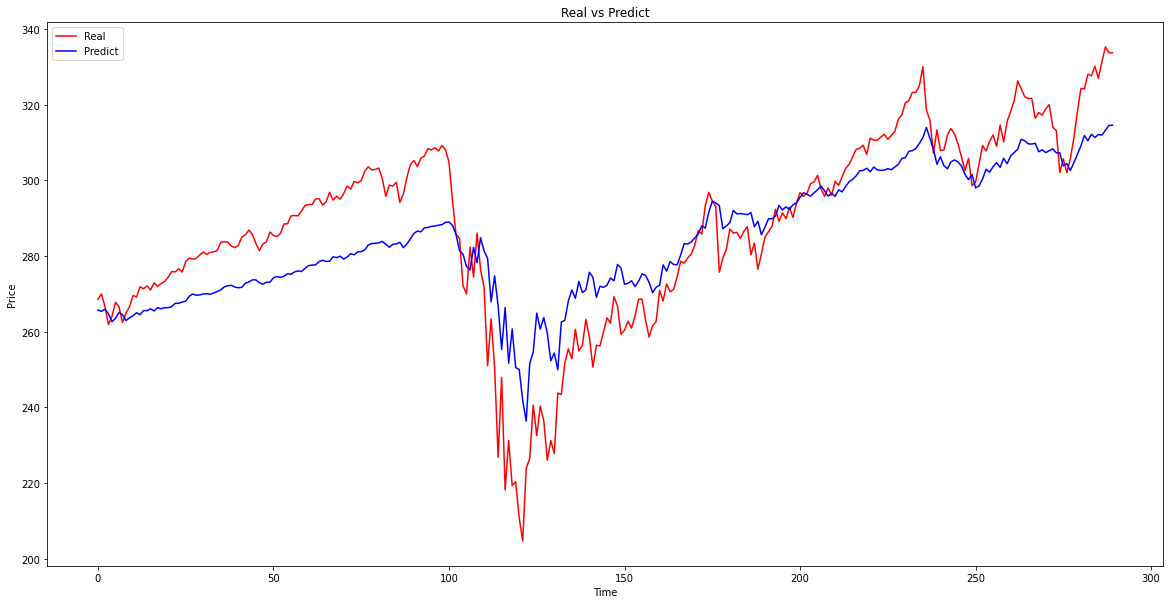

In [299]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real')
plt.plot(pred_inv_yhat, color = 'blue', label = 'Predict')
plt.title('Real vs Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [271]:
result_pred = pandas.DataFrame(pred_inv_yhat,columns =['Pred_VFNIX'])
temp =read_csv(filename="PRED_NEW",folder=folder)
temp.columns = ( 'Date','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh', 'spx')                                                    
temp = temp[['Date','vfx']]
result = pandas.concat([temp,result_pred], axis = 1)
result.to_csv('final_new.csv')